In [104]:
import pandas as pd

In [105]:
train_data = pd.read_csv("./train.csv")
print("데이터 shape \n {}".format(train_data.shape))
print()
print("데이터 5개 미리보기 \n {}".format(train_data.head()))
print()
print("데이터 정보")
print(train_data.info())
print()
print("null값을 가지고 있는 데이터 \n {}".format(train_data.isnull().sum()))

데이터 shape 
 (891, 12)

데이터 5개 미리보기 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0          

In [106]:
import missingno as msno

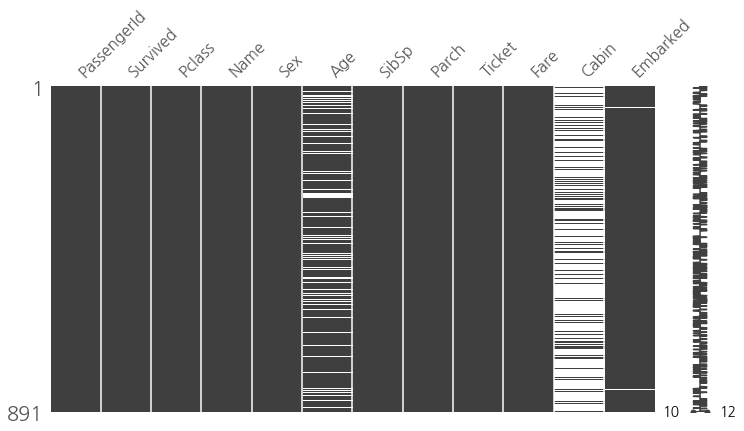

In [107]:
msno.matrix(train_data, figsize=(12,6))

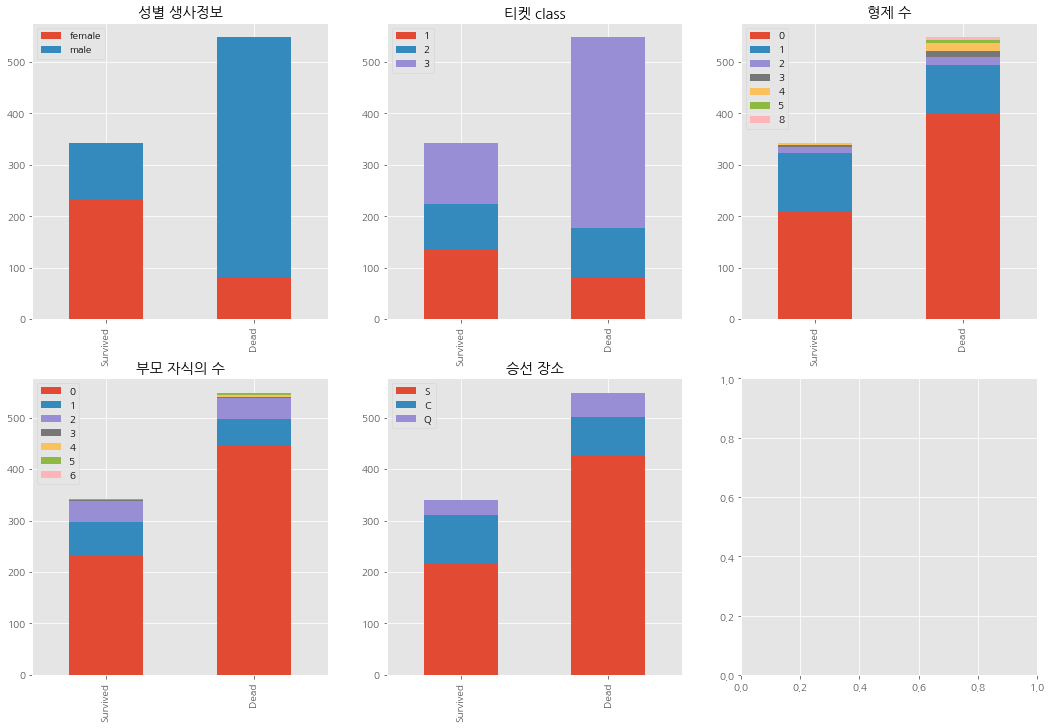

In [108]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
# 한글 깨짐 해결

def bar_chart(feature, ax):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, ax=ax)
    # stacked 가 True이면 데이터를 쌓아서 보여준다
    
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)
ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

plt.show()

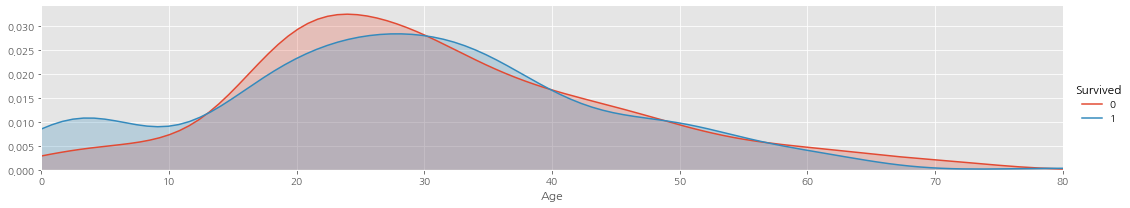

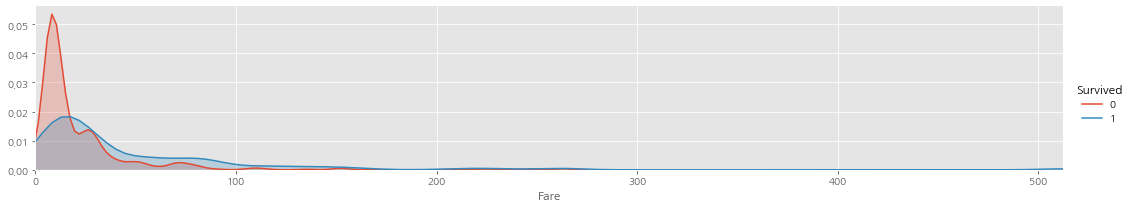

In [109]:
import seaborn as sns
def draw_facetgrid(feature):
    # train에 저장된 DataFrame을 FacetGrid를 통해 그래프로 그려준다 
    # hue="Survived"는 그래프의 범례(legend)의 이름을 설정
    # aspect=5 는 그래프의 종횡비를 설정
    facet = sns.FacetGrid(train_data, hue="Survived", aspect=5)

    # facet.map()은 kedplot 방식을 사용하여 주어진 데이터 feature를 plotting 하는 
    # 즉, 그래프를 그리는 기능 
    facet.map(sns.kdeplot, feature, shade=True)
    # 0 부터 값의 주어진 데이터의 최대 값까지를 x축의 범위로 설정
    facet.set(xlim=(0, train_data[feature].max()))
    # 지정된 범례(legend)를 표시
    facet.add_legend() 
    plt.show()    
    
draw_facetgrid('Age')
draw_facetgrid('Fare')

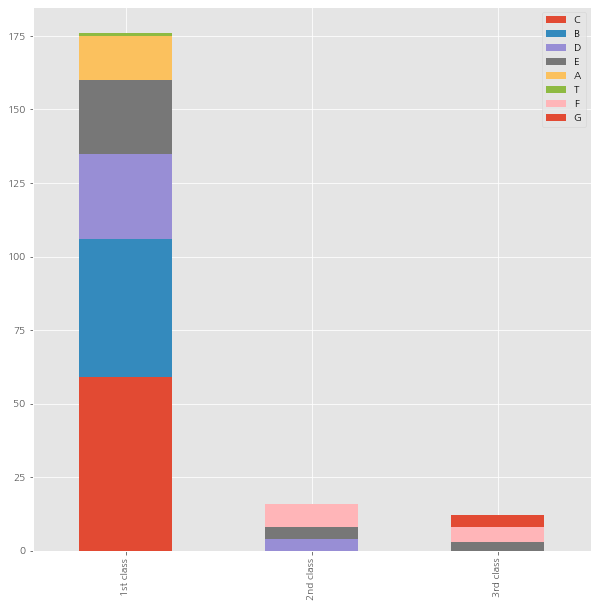

In [110]:
for dataset in [train_data]:
    dataset["Cabin"] = dataset["Cabin"].str[:1]
    
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize=(10, 10))

# Feature Engineering

* 데이터를 분석한 내용과 도메인 지식을 바탕으로 알맞은 Feature vector(컴퓨터가 알 수 있는 숫자)로 바꿔 주는 작업
* 이 작업이 필요한 이유는 machine learning 을 통해 학습을 시켜서 알고리듬을 만들기 위해서 필요하다.

# 모델링
* 문제에 맞는 알고리즘을 알맞게 적용 및 검증
# Cross validation, K-fold
* 데이터 셋을 나워서 일부분은 테스트 데이터 일부분은 학습용 데이터로 사용해서 모델의 정확도를 검증하는 방법
# 점수를 높일 수 있는 스킬
* 점수를 높이기 위해서는 기본적으로 여러 가정을 하고 테스트를 반복하는 과정이 필요
    * 데어터를 조합 ex 가족 + 가식 수를 더한 데이터 이용
        * 단순히 중간 값을 null값을 채우는 것이 아니라 머신러닝을 이용
    * Featureing 값 수정
    * 데이터 심화 분석
    
* 중요한 데이터는 사이거리를 더 멀리한다 (KNN) 거리가 멀수록 연관성이 없다 

In [167]:
# 데이터 분석에 필요한 라이브러리들을 import
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc
import missingno as msno

# os x(mac os) 한글 font 
rc('font', family='AppleGothic')

# 노트북 안에 그래프를 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False



In [168]:
# data load

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [169]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [170]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
# 2번쨰 column name

train_test_data = [train, test]
print(type(train_test_data))

<class 'list'>


In [173]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    # expand가 True이면 데이터 프레임
    # expand가 False이면 시리즈 데이터
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [174]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [175]:
# Name을 사용해서 유의미한 정보를 얻었기 때문에
test.drop('Name', axis = 1, inplace = True)
train.drop('Name', axis = 1, inplace = True)
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [176]:

rarelist = []
for a in set(train['Title']):
      if list(train['Title']).count(a)<10:
            rarelist.append(a)
    
for dataset in train_test_data:
      dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
      dataset['Title'] = dataset['Title'].replace('Ms','Miss')
      dataset['Title'] = dataset['Title'].replace('Mmm','Mrs')
      dataset['Title'] = dataset['Title'].replace(rarelist,'Rare')
  
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.375000


In [177]:
title_mapping = {"Master":1, "Miss":2,"Mr":3, "Mrs":4, "Rare":5}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [178]:
# title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
#                 "Master":0, "Dr":3, "Rev":3, "Col": 3, 'Ms': 2, 'Mlle': 3, "Major": 3, 'Lady': 2, 'Capt': 3,
#                  'Sir': 0, 'Dona': 3, 'Mme':3, 'Jonkheer': 1, 'Countess': 3 ,'Don':3}
# for dataset in train_test_data:
#     dataset['Title'] = dataset['Title'].map(title_mapping)

In [179]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,4


In [180]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,3.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,4.0


In [181]:
# 4.3 sex
sex_mapping = {'male': 0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [182]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,NaN,S,3


In [183]:
# 4.4 age
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [184]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [185]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [186]:
train['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [187]:
# Age를 구간별로 나누기
train['AgeBand'] = pd.cut(train['Age'],5)
train[['AgeBand','Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [188]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age'] = 1,
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age'] = 2,
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age'] = 3,
    dataset.loc[dataset['Age']>64, 'Age'] = 4

In [189]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,3,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,4,"(32.252, 48.168]"
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]"


In [190]:
# 4.5 embark

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
AgeBand          0
dtype: int64

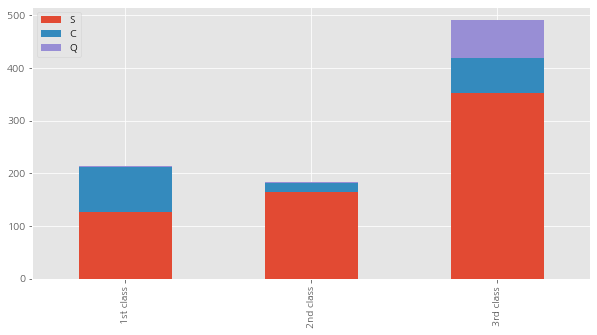

In [191]:
plt.rc('font', family='NanumGothic')

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize=(10, 5))

In [192]:
# 탄위치를 가장 많이 탄 위치인 S로 해준다
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].fillna('S')

In [193]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [194]:
embarked_mapping = {
    "S" : 0,
    "Q" : 1,
    "C" : 2
}

In [195]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [196]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,3,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,2,4,"(32.252, 48.168]"


In [197]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,1,3.0
1,893,3,1,2.0,1,0,363272,7.0000,NaN,0,4.0


In [198]:
# 4.6 Fare 입장료의 null값을 같은 클래스의 중간값으로
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("median"), inplace = True)

In [199]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [200]:
# 가격의 구간별로 데이터를 나누어 보자
train['FareBand'] = pd.cut(train['Fare'],5)
train[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


In [201]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=102, 'Fare'] = 0,
    dataset.loc[(dataset['Fare']>102) & (dataset['Fare']<=204), 'Fare'] = 1,
    dataset.loc[(dataset['Fare']>204) & (dataset['Fare']<=307), 'Fare'] = 2,
    dataset.loc[dataset['Fare']>307, 'Fare'] = 4

In [202]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,3,"(16.336, 32.252]","(-0.512, 102.466]"
1,2,1,1,1,2.0,1,0,PC 17599,0.0,C85,2,4,"(32.252, 48.168]","(-0.512, 102.466]"
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,2,"(16.336, 32.252]","(-0.512, 102.466]"


In [203]:
# 확인 하기위해 만들어준 칼럼을 제거한다
train.drop('AgeBand', axis=1, inplace=True)
train.drop('FareBand', axis=1, inplace=True)

In [204]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,3


In [205]:
# 데이터가 많이 없기 때문에 버려준다
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [206]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,3


In [207]:
# ticket 번호로 생존여부를 확인할 수 없으므로 삭제
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [208]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,0,3


In [209]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,0.0,1,3.0


In [210]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [211]:
train["FamilySize"].value_counts

for dataset in train_test_data:
    dataset['isAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1

In [212]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2, 7:2.4, 8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

(0, 4.0)

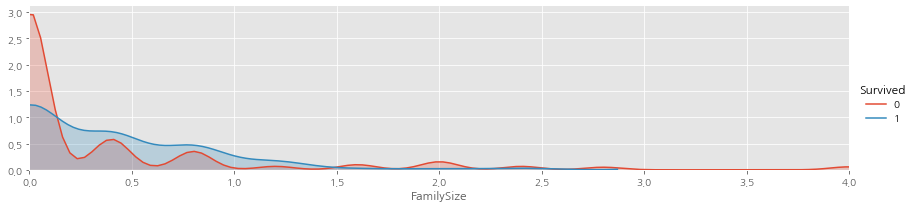

In [213]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [214]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,1,0,3,0,1.0,1,0,0.0,0,3,0.4,0


In [215]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,892,3,0,2.0,0,0,0.0,1,3.0,0.0,1


In [216]:
dropped_data = ['Survived','PassengerId']

In [217]:
train_data = train.drop(dropped_data, axis = 1)

# Modeling

In [218]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## cross_validataion(k-fold)

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [220]:
train_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
isAlone       0
dtype: int64

In [221]:
import numpy as np

## KNN

In [222]:
target = train['Survived']
clf = KNeighborsClassifier(n_neighbors=11) 
# 주변의 11개의 데이터를 확인한다


scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print(round(np.mean(score*100),2))

[0.76666667 0.78651685 0.80898876 0.79775281 0.83146067 0.79775281
 0.78651685 0.78651685 0.79775281 0.79775281]
79.58


## decision tree

In [223]:


clf = DecisionTreeClassifier()

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print(round(np.mean(score*100),2))

[0.84444444 0.82022472 0.82022472 0.82022472 0.83146067 0.82022472
 0.80898876 0.83146067 0.7752809  0.79775281]
81.7


## Naive Bayes

In [224]:


clf = GaussianNB()

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print(round(np.mean(score*100),2))

[0.81111111 0.76404494 0.76404494 0.80898876 0.79775281 0.80898876
 0.82022472 0.84269663 0.83146067 0.80898876]
80.58


## svm

In [225]:


clf = SVC()

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print(round(np.mean(score*100),2))

[0.84444444 0.80898876 0.82022472 0.82022472 0.85393258 0.82022472
 0.82022472 0.86516854 0.83146067 0.86516854]
83.5


## randomforest

In [226]:


clf = RandomForestClassifier()

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print(round(np.mean(score*100),2))

[0.81111111 0.82022472 0.7752809  0.78651685 0.83146067 0.79775281
 0.83146067 0.84269663 0.7752809  0.82022472]
80.92


# testing

In [227]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis = 1).copy()
prediction = clf.predict(test_data)

In [228]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv('submission.csv', index = False)